In [35]:
import pandas as pd
import yfinance as yf

# Download historical stock data
tckr = str(input("Enter your Ticker: "))
tckr = tckr.upper()
df = yf.download(tckr, start='2020-01-01', end='2025-12-31')

# Keep only relevant columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

[*********************100%***********************]  1 of 1 completed


In [36]:
# Predict the next day's closing price
df['Next_High'] = df['High'].shift(-1)

# Drop last row (target is NaN)
df.dropna(inplace=True)

# Define features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_High']

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple feedforward neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse')

c:\Users\genas\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Early stopping to prevent overfitting
# ReduceLROnPlateau to adapt the learning rate dynamically
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks for early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stop, reduce_lr],verbose=1)

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 139.7745 - val_loss: 146.3322 - learning_rate: 0.0010
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89.9037 - val_loss: 35.7592 - learning_rate: 0.0010
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.5597 - val_loss: 0.4894 - learning_rate: 0.0010
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8701 - val_loss: 0.2740 - learning_rate: 0.0010
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4093 - val_loss: 0.1070 - learning_rate: 0.0010
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3318 - val_loss: 0.1069 - learning_rate: 0.0010
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2644 - val_loss: 0.0843 - learning_rate: 0.0010
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2179 - val_loss: 0.0633 - learning_rate: 0.0010
Epoch 9/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1640 - val_loss: 0.0548 - learning_rate: 0.0010
Epoch 10/200

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# R² compares your model to a baseline model that always predicts the mean.
# If R² is close to 1, your model is capturing most of the trend in the data.
# If R² is 0, your model is no better than guessing the average.
from sklearn.metrics import r2_score

# Predict on test set
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")  # Target: > 0.75



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
R² Score: 0.9743


In [32]:
y_test

Date
2024-04-29    15.002875
2024-04-30    15.029955
2024-05-01    14.605687
2024-05-02    14.831363
2024-05-03    14.862957
                ...    
2025-05-22    10.255000
2025-05-23    10.580000
2025-05-27    10.600000
2025-05-28    10.520000
2025-05-29    10.505000
Name: Next_High, Length: 272, dtype: float64

In [33]:
y_pred

array([15.238492 , 15.050052 , 14.873781 , 14.677403 , 14.79311  ,
       14.952763 , 14.8768635, 14.517244 , 14.479205 , 14.545731 ,
       14.580072 , 14.7144575, 14.863482 , 14.878321 , 14.958124 ,
       14.853592 , 14.785938 , 14.751127 , 14.615145 , 14.71037  ,
       14.638977 , 14.281748 , 14.396776 , 14.444104 , 14.560487 ,
       14.4639225, 14.17724  , 13.994378 , 13.72078  , 13.707962 ,
       13.570063 , 13.863494 , 13.871038 , 13.481356 , 13.541731 ,
       13.731047 , 13.567154 , 13.640224 , 13.5894165, 13.432941 ,
       13.386671 , 13.506119 , 13.82498  , 13.78341  , 13.654566 ,
       13.57822  , 13.487844 , 13.4540205, 13.319743 , 13.350054 ,
       13.510911 , 13.635922 , 13.767218 , 13.971109 , 14.125147 ,
       13.9057   , 13.665057 , 13.8893795, 13.9995165, 13.713013 ,
       13.553092 , 13.833587 , 14.048008 , 14.160028 , 14.066184 ,
       14.09114  , 13.349266 , 12.720596 , 12.863327 , 12.870022 ,
       12.97941  , 12.964783 , 12.969928 , 12.882859 , 12.9217

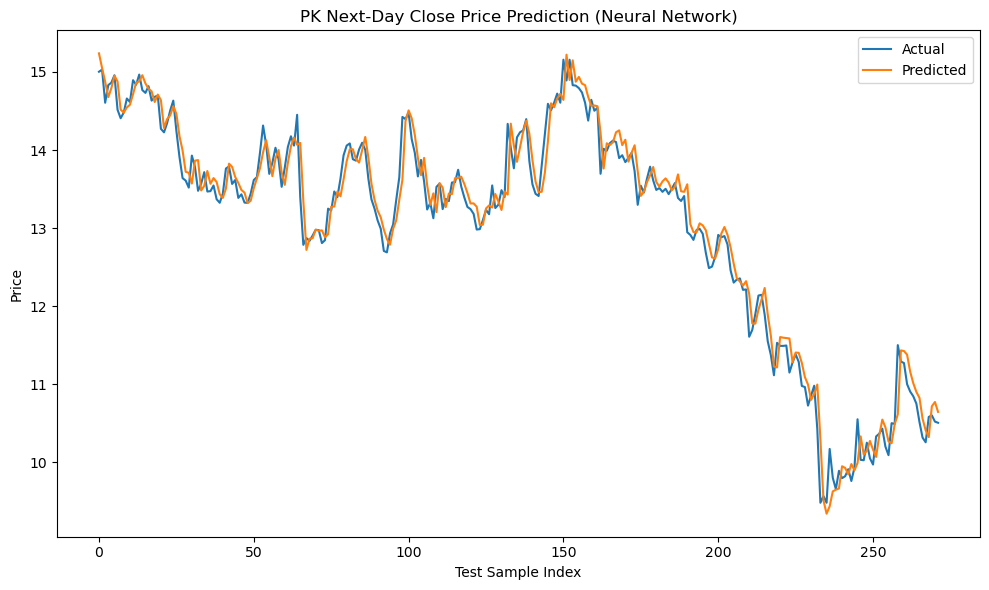

In [34]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test.values, label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted')
plt.title(f'{tckr} Next-Day Close Price Prediction (Neural Network)')
plt.xlabel('Test Sample Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()